<a href="https://colab.research.google.com/github/LilianeEff/Data205/blob/main/EDA_for_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_palette("bright")
import folium
from folium.plugins import HeatMap

**Datasets used**

The School dataset lists all the schools in the counties along with their performance.
The location dataset has the cities in which the schools are located.

In [2]:
school=pd.read_csv("https://raw.githubusercontent.com/LilianeEff/Data205/refs/heads/main/Datasets/FY2013_MSDE_School_Participation_Indicators_-_All_Schools_20250208.csv")
location=pd.read_csv("https://raw.githubusercontent.com/LilianeEff/Data205/refs/heads/main/Datasets/Public_Schools.csv")



For the third dataset, an API request had to be sent to the Census Bureau. This dataset comprises the median home value in cities surrounding Montgomery County.

In [3]:
import requests

# Census API endpoint
url = "https://api.census.gov/data/2022/acs/acs5"

# Parameters for API request
params = {
    "get": "NAME,B25077_001E",  # NAME = City Name, B25077_001E = Median Home Value
    "for": "place:*",           # Get all places (cities/towns)
    "in": "state:24",           # Maryland (state:24)
}

# API request
response = requests.get(url, params=params)

# Check if request was success
if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    df = pd.DataFrame(data[1:], columns=data[0])  # Convert to Pandas DataFrame
    df["B25077_001E"] = pd.to_numeric(df["B25077_001E"], errors="coerce")  # Convert median home value to numeric

    # Manually filter cities in Montgomery County
    montgomery_cities = [
        "Chevy Chase", "Chevy Chase Section Five",
        "Chevy Chase Section Three", "Aspen Hill", "Damascus", "Chevy Chase View", "Chevy Chase Village",
        "Gaithersburg", "Clarksburg", "Olney", "Garrett Park", "Glen Echo", "Kensington", "Laytonsville",
        "Martins Additions", "North Chevy Chase", "Poolesville", "Rockville",
       "Takoma Park", "Seneca Valley", "Derwood", "white Oak", "Washington Grove", "Burtonsville", "Cloverly", "Kemp Mill", "Glenmont", "Wheaton", "Silver Spring", "Bethesda", "Potomac", "Germantown",
    ]

    # Filter DataFrame for only Montgomery County cities
    df = df[df["NAME"].str.contains('|'.join(montgomery_cities), case=False, na=False)]

    # Rename columns for
    df = df.rename(columns={"NAME": "City", "B25077_001E": "Median Home Value"})
    df = df.reset_index(drop=True)  # Reset index for better display

    print(df)
else:
    print(f"Error: {response.status_code}", response.text)


                                           City  Median Home Value state  \
0                      Aspen Hill CDP, Maryland             495800    24   
1                        Bethesda CDP, Maryland            1088000    24   
2                    Burtonsville CDP, Maryland             475800    24   
3                    Chevy Chase town, Maryland            1616900    24   
4                     Chevy Chase CDP, Maryland            1159700    24   
5    Chevy Chase Section Five village, Maryland            1542900    24   
6   Chevy Chase Section Three village, Maryland            1555400    24   
7               Chevy Chase View town, Maryland            1181800    24   
8            Chevy Chase Village town, Maryland            2000001    24   
9                      Clarksburg CDP, Maryland             604000    24   
10                       Cloverly CDP, Maryland             626200    24   
11                       Damascus CDP, Maryland             474800    24   
12          

In [4]:
display(df)  #this is what the dataframe actually looks like. It does have a couple of columns that
             # are extraneous.

,City,Median Home Value,state,place
0,"Aspen Hill CDP, Maryland",495800,24,02825
1,"Bethesda CDP, Maryland",1088000,24,07125
2,"Burtonsville CDP, Maryland",475800,24,11750
3,"Chevy Chase town, Maryland",1616900,24,16620
4,"Chevy Chase CDP, Maryland",1159700,24,16625
5,"Chevy Chase Section Five village, Maryland",1542900,24,16720
6,"Chevy Chase Section Three village, Maryland",1555400,24,16730
7,"Chevy Chase View town, Maryland",1181800,24,16775
8,"Chevy Chase Village town, Maryland",2000001,24,16787
9,"Clarksburg CDP, Maryland",604000,24,17350


**Data cleaning**: removing the two columns that are not needed, and renaming the cities by omitting the extra letters attached to them from the df dataframe.

Eliminating elementary and middle schools from the school dataframe.

In [5]:
df = df.rename(columns={"NAME": "City", "B25077_001E": "Median Home Value"})
df = df.reset_index(drop=True)

# Remove 'state' and 'place' columns
if 'state' in df.columns:
        df = df.drop('state', axis=1)
if 'place' in df.columns:
        df = df.drop('place', axis=1)

display(df)


,City,Median Home Value
0,"Aspen Hill CDP, Maryland",495800
1,"Bethesda CDP, Maryland",1088000
2,"Burtonsville CDP, Maryland",475800
3,"Chevy Chase town, Maryland",1616900
4,"Chevy Chase CDP, Maryland",1159700
5,"Chevy Chase Section Five village, Maryland",1542900
6,"Chevy Chase Section Three village, Maryland",1555400
7,"Chevy Chase View town, Maryland",1181800
8,"Chevy Chase Village town, Maryland",2000001
9,"Clarksburg CDP, Maryland",604000


In [6]:
#Rename cities by removing their classifications and the name of the state
df.loc[df['City'].str.contains('Germantown CDP', case=False), 'City'] = 'Germantown'
df.loc[df['City'].str.contains('Chevy Chase CDP', case=False), 'City'] = 'Chevy Chase'
df.loc[df['City'].str.contains('Chevy Chase Section Five Village', case=False), 'City'] = 'Chevy Chase Section Five'
df.loc[df['City'].str.contains('Chevy Chase Section Three Village', case=False), 'City'] = 'Chevy Chase Section Three'
df.loc[df['City'].str.contains('Chevy Chase View Town', case=False), 'City'] = 'Chevy Chase View'
df.loc[df['City'].str.contains('Chevy Chase Village Town', case=False), 'City'] = 'Chevy Chase Village'
df.loc[df['City'].str.contains('Derwood CDP', case=False), 'City'] = 'Derwood'
df.loc[df['City'].str.contains('Bethesda CDP', case=False), 'City'] = 'Bethesda'
df.loc[df['City'].str.contains('Silver Spring CDP', case=False), 'City'] = 'Silver Spring'
df.loc[df['City'].str.contains('Washington Grove Town', case=False), 'City'] = 'Washington Grove'
df.loc[df['City'].str.contains('Potomac CDP', case=False), 'City'] = 'Potomac'
df.loc[df['City'].str.contains('Potomac Heights CDP', case=False), 'City'] = 'Potomac Heights'
df.loc[df['City'].str.contains('Potomac Park CDP', case=False), 'City'] = 'Potomac Park'
df.loc[df['City'].str.contains('Martins Addition CDP', case=False), 'City'] = 'Martins Addition'
df.loc[df['City'].str.contains('Damascus CDP', case=False), 'City'] = 'Damascus'
df.loc[df['City'].str.contains('Laytonsville Town', case=False), 'City'] = 'Laytonsville'
df.loc[df['City'].str.contains('Kensington Town', case=False), 'City'] = 'Kensington'
df.loc[df['City'].str.contains('Glen Echo Town', case=False), 'City'] = 'Glen Echo'
df.loc[df['City'].str.contains('Garrett Park Town', case=False), 'City'] = 'Garrett Park'
df.loc[df['City'].str.contains('Olney CDP', case=False), 'City'] = 'Olney'
df.loc[df['City'].str.contains('Clarksburg CDP', case=False), 'City'] = 'Clarksburg'
df.loc[df['City'].str.contains('Gaithersburg City', case=False), 'City'] = 'Gaithersburg'
df.loc[df['City'].str.contains('Takoma Park City', case=False), 'City'] = 'Takoma Park'
df.loc[df['City'].str.contains('Somerset Town', case=False), 'City'] = 'Somerset'
df.loc[df['City'].str.contains('South Kensington CDP', case=False), 'City'] = 'South Kensington'
df.loc[df['City'].str.contains('Rockville City', case=False), 'City'] = 'Rockville'
df.loc[df['City'].str.contains('Poolesville Town', case=False), 'City'] = 'Poolesville'
df.loc[df['City'].str.contains('North Betheda CDP', case=False), 'City'] = 'North Bethesda'
df.loc[df['City'].str.contains('North Chevy Chase Village', case=False), 'City'] = 'North Chevy Chase'
df.loc[df['City'].str.contains('North Potomac CDP', case=False), 'City'] = 'North Potomac'
df.loc[df['City'].str.contains('white Oak CDP', case=False), 'City'] = 'White Oak'
df.loc[df['City'].str.contains('Aspen Hill CDP', case=False), 'City'] = 'Aspen Hill'
df.loc[df['City'].str.contains('Glenmont CDP', case=False), 'City'] = 'Glenmont'
df.loc[df['City'].str.contains('Wheaton CDP', case=False), 'City'] = 'Wheaton'
df.loc[df['City'].str.contains('Burtonsville CDP', case=False), 'City'] = 'Burtonsville'
df.loc[df['City'].str.contains('Cloverly CDP', case=False), 'City'] = 'Cloverly'
df.loc[df['City'].str.contains('Kemp Mill CDP', case=False), 'City'] = 'Kemp Mill'
df.loc[df['City'].str.contains('North Kensington CDP', case=False), 'City'] = 'North Kensington'
df.loc[df['City'].str.contains('Kensington', case=False), 'City'] = 'Kensington'

display(df)

,City,Median Home Value
0,Aspen Hill,495800
1,Bethesda,1088000
2,Burtonsville,475800
3,"Chevy Chase town, Maryland",1616900
4,Chevy Chase,1159700
5,Chevy Chase Section Five,1542900
6,Chevy Chase Section Three,1555400
7,Chevy Chase View,1181800
8,Chevy Chase Village,2000001
9,Clarksburg,604000


Since the dataframe 'school' lists all the schools in the county and we're only interested in the high schools, lets filter the other ones out. The data can also be skewed when alternative and charter schools are included so we will remove them as well. Additionally, there are three schools with missing values so they'll have to be removed as well.

In [7]:
school = school[~school['School Name'].str.endswith('ES')]
school = school[~school['School Name'].str.endswith('MS')]
school = school[~school['School Name'].str.contains('RICA', na=False)]
school = school[~school['School Name'].str.contains('Community Montessori Charter', na=False)]
school = school[~school['School Name'].str.contains('Alternative Programs', na=False)]
school = school[~school['School Name'].str.contains('Carl Sandburg Learning Center', na=False)]
school = school.dropna()

display(school)


,School Year,School Number,School Name,Principal,Phone,Associate Superintendent,Cluster,Attendance Rate,Drop out rate,Mobility Rate (Entrants + Withdrawals),Grade 12 Documented Decision - College,Grade 12 Documented Decision - Employment,Grade 12 Documented Decision - Military,Grade 12 Documented Decision - College - Employment,Graduation Rate,Students Meeting University System of Maryland Requirements,Location 1
6,2014,551,Gaithersburg HS,Dr. Christine C. Handy-Collins,(301) 284-4500,Dr. Christopher S. Garran,Gaithersburg,92.4,10.1,16.9,85.6,5.0,5.0,60.9,76.9,64.9,"101 Education Boulevard\nGaithersburg, MD 2087..."
10,2014,125,Quince Orchard HS,Mrs. Carole A. Working,(301) 840-4686,Dr. Christopher S. Garran,Quince Orchard,94.7,5.0,8.3,94.1,5.0,5.0,58.9,88.3,82.7,"15800 Quince Orchard Road\nGaithersburg, MD 20..."
23,2014,249,Clarksburg HS,Mr. James P. Koutsos,(301) 444-3000,Dr. Christopher S. Garran,Clarksburg,95.0,6.5,10.4,92.7,5.0,5.0,61.9,88.6,71.8,"22500 Wims Road\nClarksburg, MD 20871\n(39.225..."
28,2014,789,Albert Einstein HS,Mr. James G. Fernandez,(301) 929-2200,Dr. Christopher S. Garran,Downcounty Consortium,93.7,12.1,12.8,89.7,5.0,5.0,65.0,79.5,61.8,"11135 Newport Mill Road\nKensington, MD 20895\..."
48,2014,424,Walter Johnson HS,Mrs. Jennifer A. Baker,(301) 803-7100,Dr. Christopher S. Garran,Walter Johnson,95.0,5.0,7.0,94.3,5.0,5.0,51.2,95.0,82.6,"6400 Rock Spring Drive\nBethesda, MD 20814\n(3..."
82,2014,406,Bethesda-Chevy Chase HS,Mrs. Karen L. Lockard,(240) 497-6300,Dr. Christopher S. Garran,Bethesda-Chevy Chase,95.0,5.0,7.0,94.8,5.0,5.0,41.4,94.4,87.7,"4301 East West Highway\nBethesda, MD 20814\n(3..."
85,2014,246,Northwest HS,Ms. E. Lancellotti (Lance) Dempsey,(301) 601-4660,Dr. Christopher S. Garran,Northwest,94.9,5.9,10.0,95.0,5.0,5.0,56.9,91.1,88.2,"13501 Richter Farm Road\nGermantown, MD 20874\..."
91,2014,701,Damascus HS,Mrs. Jennifer L. Webster,(301) 253-7030,Dr. Christopher S. Garran,Damascus,95.0,5.0,6.1,95.0,5.0,5.0,63.5,92.3,82.7,"25921 Ridge Road\nDamascus, MD 20872\n(39.2818..."
95,2014,104,Seneca Valley HS,Mr. Marc J. Cohen,(301) 353-8000,Dr. Christopher S. Garran,Seneca Valley,93.2,7.6,17.3,93.1,5.0,5.0,71.4,81.5,65.2,"19401 Crystal Rock Drive\nGermantown, MD 20874..."
102,2014,545,Watkins Mill HS,Mr. Scott W. Murphy,(301) 840-3959,Dr. Christopher S. Garran,Watkins Mill,92.8,5.1,14.1,84.8,5.0,5.0,65.5,85.3,62.8,"10301 Apple Ridge Road\nGaithersburg, MD 20879..."


Now I'll assign school clusters to their respective cities to better group the values that are needed for the analysis.

In [8]:
# Creating the column 'Cluster'
df['Cluster'] = ''

# Assign clusters based on city names
df.loc[df['City'].isin(['Rockville']), 'Cluster'] = 'Rockville'
df.loc[df['City'].isin(['Bethesda', 'North Chevy Chase', 'Martins Addition','Chevy Chase Village', 'Chevy Chase Town', 'Chevy Chase','Chevy Chase Section Three', 'Chevy Chase View', 'Chevy Chase Town Maryland', 'Chevy Chase Section Five']), 'Cluster'] = 'Bethesda-Chevy Chase'
df.loc[df['City'].isin(['Silver Spring', 'Takoma Park', 'Wheaton', 'Kemp Mill', 'Kensington', 'Glenmont']), 'Cluster'] = 'Downcounty Consortium'
df.loc[df['City'].isin(['Potomac', 'Potomac Park']), 'Cluster'] = 'Potomac'
df.loc[df['City'].isin(['Poolesville']), 'Cluster'] = 'Poolesville'
df.loc[df['City'].isin(['Damascus']), 'Cluster'] = 'Damascus'
df.loc[df['City'].isin(['Germantown', ]), 'Cluster'] = 'Germantown'
df.loc[df['City'].isin(['Cloverly', 'Burtonsville', 'White Oak']), 'Cluster'] = 'Northeast Consortium'
df.loc[df['City'].isin(['Clarksburg']), 'Cluster'] = 'Clarksburg'
df.loc[df['City'].isin(['North Bethesda', 'Garrett Park']), 'Cluster'] = 'Walter Johnson'
df.loc[df['City'].isin(['Derwood']), 'Cluster'] = 'Col. Zadok Magruder'
df.loc[df['City'].isin(['Rockville', 'North Bethesda']), 'Cluster'] = 'Richard Montgomery'
df.loc[df['City'].isin(['Bethesda', 'Glen Echo']), 'Cluster'] = 'Walt Whitman'
df.loc[df['City'].isin(['Olney']), 'Cluster'] = 'Sherwood'
df.loc[df['City'].isin(['Potomac Heights']), 'Cluster'] = 'Potomac Heights'
df.loc[df['City'].isin(['Rockville']), 'Cluster'] = 'Thomas S. Wooton'
df.loc[df['City'].isin(['North Potomac']), 'Cluster'] = 'Winston Churchill'
df.loc[df['City'].isin(['Germantown']), 'Cluster'] = 'Seneca Valley'
df.loc[df['City'].isin(['Germantown']), 'Cluster'] = 'Northwest'
df.loc[df['City'].isin(['Gaithersburg', 'Laytonsville', 'Washington Grove']), 'Cluster'] = 'Gaithersburg'
df.loc[df['City'].isin(['Kensington']), 'Cluster'] = 'Kensington'


# Display the updated DataFrame
df


,City,Median Home Value,Cluster
0,Aspen Hill,495800,
1,Bethesda,1088000,Walt Whitman
2,Burtonsville,475800,Northeast Consortium
3,"Chevy Chase town, Maryland",1616900,
4,Chevy Chase,1159700,Bethesda-Chevy Chase
5,Chevy Chase Section Five,1542900,Bethesda-Chevy Chase
6,Chevy Chase Section Three,1555400,Bethesda-Chevy Chase
7,Chevy Chase View,1181800,Bethesda-Chevy Chase
8,Chevy Chase Village,2000001,Bethesda-Chevy Chase
9,Clarksburg,604000,Clarksburg


In [9]:
# Potomac Park and Potomac Heights are not in Montgomery County, and since the Census always includes them when Potomac is
#prompted, we should remove them from our list of cities with clusters.
df = df[~df['City'].isin(['Potomac Heights', 'Potomac Park'])]
print(df)


                          City  Median Home Value                Cluster
0                   Aspen Hill             495800                       
1                     Bethesda            1088000           Walt Whitman
2                 Burtonsville             475800   Northeast Consortium
3   Chevy Chase town, Maryland            1616900                       
4                  Chevy Chase            1159700   Bethesda-Chevy Chase
5     Chevy Chase Section Five            1542900   Bethesda-Chevy Chase
6    Chevy Chase Section Three            1555400   Bethesda-Chevy Chase
7             Chevy Chase View            1181800   Bethesda-Chevy Chase
8          Chevy Chase Village            2000001   Bethesda-Chevy Chase
9                   Clarksburg             604000             Clarksburg
10                    Cloverly             626200   Northeast Consortium
11                    Damascus             474800               Damascus
12                     Derwood             558000  

**Summary Statistics**

In [10]:
# Summary statistics for the 'school' dataset
school.describe()
school.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 6 to 200
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   School Year                                                  25 non-null     int64  
 1   School Number                                                25 non-null     int64  
 2   School Name                                                  25 non-null     object 
 3   Principal                                                    25 non-null     object 
 4   Phone                                                        25 non-null     object 
 5   Associate Superintendent                                     25 non-null     object 
 6   Cluster                                                      25 non-null     object 
 7   Attendance Rate                                              25 non-null     float64
 

In [11]:
school.describe()

,School Year,School Number,Attendance Rate,Drop out rate,Mobility Rate (Entrants + Withdrawals),Grade 12 Documented Decision - College,Grade 12 Documented Decision - Employment,Grade 12 Documented Decision - Military,Grade 12 Documented Decision - College - Employment,Graduation Rate,Students Meeting University System of Maryland Requirements
count,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.000000,25.000000,25.000000
mean,2014.0,463.320000,94.396000,7.224000,10.640000,92.696000,5.0,5.0,58.076000,87.664000,77.400000
std,0.0,240.829248,0.846798,2.689839,3.644059,2.868432,0.0,0.0,10.441036,5.994712,9.716995
min,2014.0,104.000000,92.400000,5.000000,5.000000,84.800000,5.0,5.0,37.300000,76.100000,61.800000
25%,2014.0,246.000000,94.000000,5.000000,8.300000,92.700000,5.0,5.0,53.000000,81.600000,71.500000
50%,2014.0,427.000000,95.000000,6.200000,10.400000,93.300000,5.0,5.0,60.700000,88.600000,79.400000
75%,2014.0,701.000000,95.000000,8.800000,12.800000,95.000000,5.0,5.0,65.000000,92.900000,85.200000
max,2014.0,815.000000,95.000000,13.100000,17.300000,95.000000,5.0,5.0,74.100000,95.000000,94.500000


In [12]:
# mean of the Graduation Rate in the county
mean_graduation_rate = school['Graduation Rate'].mean()

# Print the mean graduation rate
print(f"Mean Graduation Rate: {mean_graduation_rate}")

Mean Graduation Rate: 87.66400000000002


In [13]:
# Summary Statistics for the median home value dataframe in standard form
pd.options.display.float_format = '{:.2f}'.format
df.describe()


,Median Home Value
count,35.00
mean,820805.74
std,389852.02
min,393700.00
25%,535550.00
50%,626200.00
75%,1032400.00
max,2000001.00


In [14]:
#let's get the means of all the clusters

# Group data by cluster and calculate the mean of 'Median Home Value' for each cluster
cluster_means = df.groupby('Cluster')['Median Home Value'].mean()

# Print the mean for each cluster
cluster_means


,Median Home Value
Cluster,
,1056350.00
Bethesda-Chevy Chase,1417216.83
Clarksburg,604000.00
Col. Zadok Magruder,558000.00
Damascus,474800.00
Downcounty Consortium,556100.00
Gaithersburg,687266.67
Kensington,775700.00
Northeast Consortium,525666.67


**Visualizations**

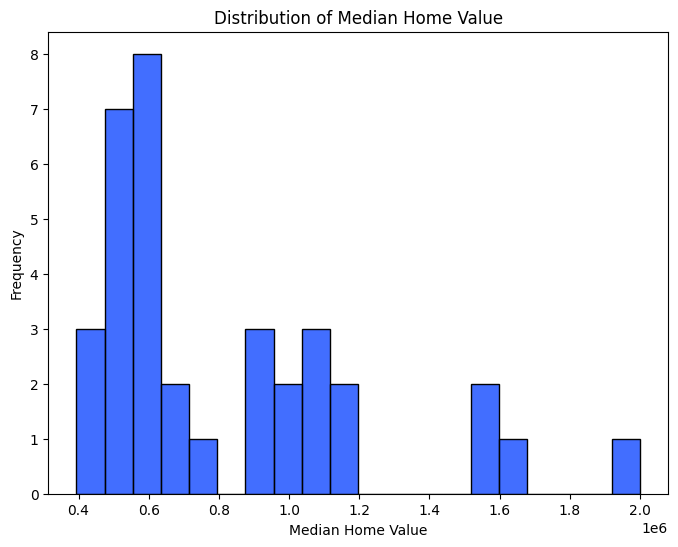

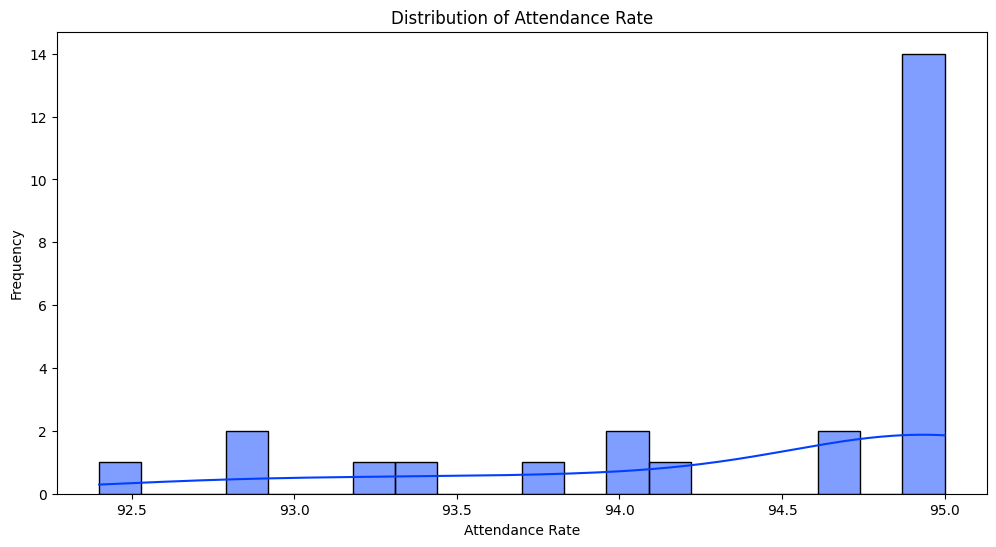

In [15]:
# Histogram for 'Median Home Value' in 'df'
plt.figure(figsize=(8, 6))
sns.histplot(df['Median Home Value'], bins=20)
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.show()

# Histograms for attendance rate in 'school'
plt.figure(figsize=(12, 6))
sns.histplot(school['Attendance Rate'], bins=20, kde=True)
plt.title('Distribution of Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.show()



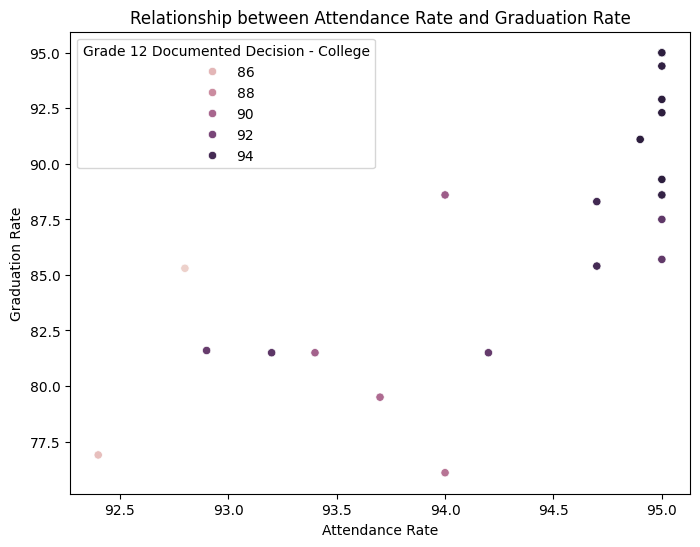

In [16]:
# Scatter plot to explore relationship between two attendance rate and graduation rate,
#colored depending on college admittance.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance Rate', y='Graduation Rate', data=school, hue='Grade 12 Documented Decision - College')
plt.title('Relationship between Attendance Rate and Graduation Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Graduation Rate')
plt.show()

<ipython-input-17-ed779ea69f8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Median Home Value', y='City', data=df, orient='h', palette='viridis')


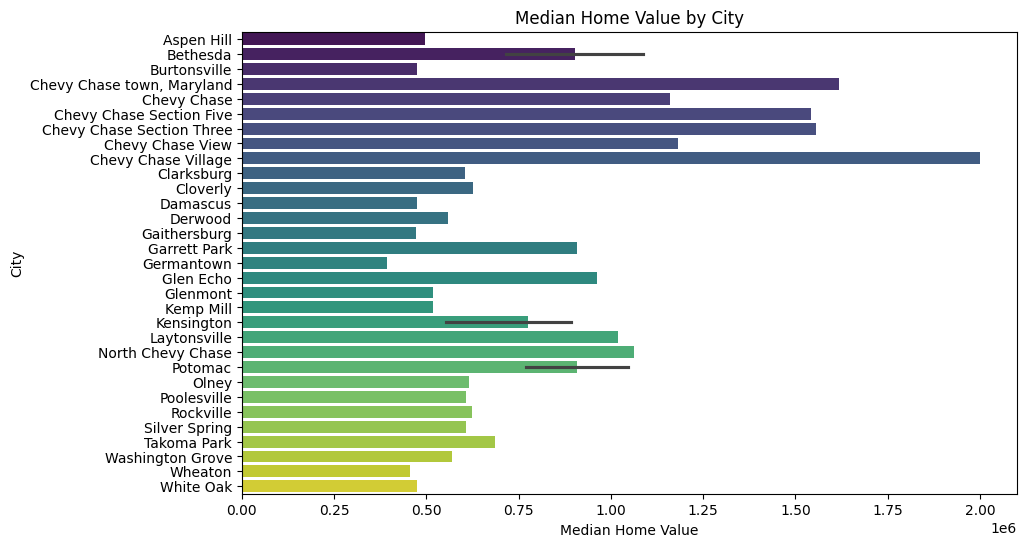

In [17]:
#Bar chart that shows the median value of homes per cities
plt.figure(figsize=(10, 6))
sns.barplot(x='Median Home Value', y='City', data=df, orient='h', palette='viridis')
plt.title('Median Home Value by City')
plt.xlabel('Median Home Value')
plt.ylabel('City')
plt.show()

<ipython-input-18-ae48ce804d96>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Median Home Value', data=df, palette='viridis')


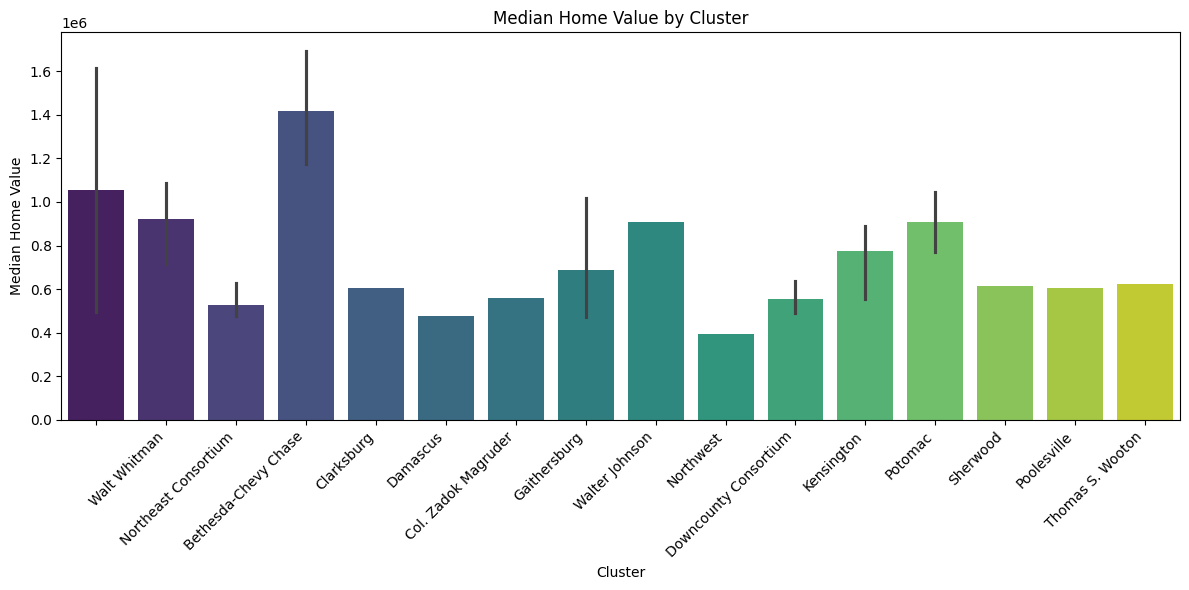

In [18]:
#Let's visualize median home value by cluster

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Median Home Value', data=df, palette='viridis')
plt.title('Median Home Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Home Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


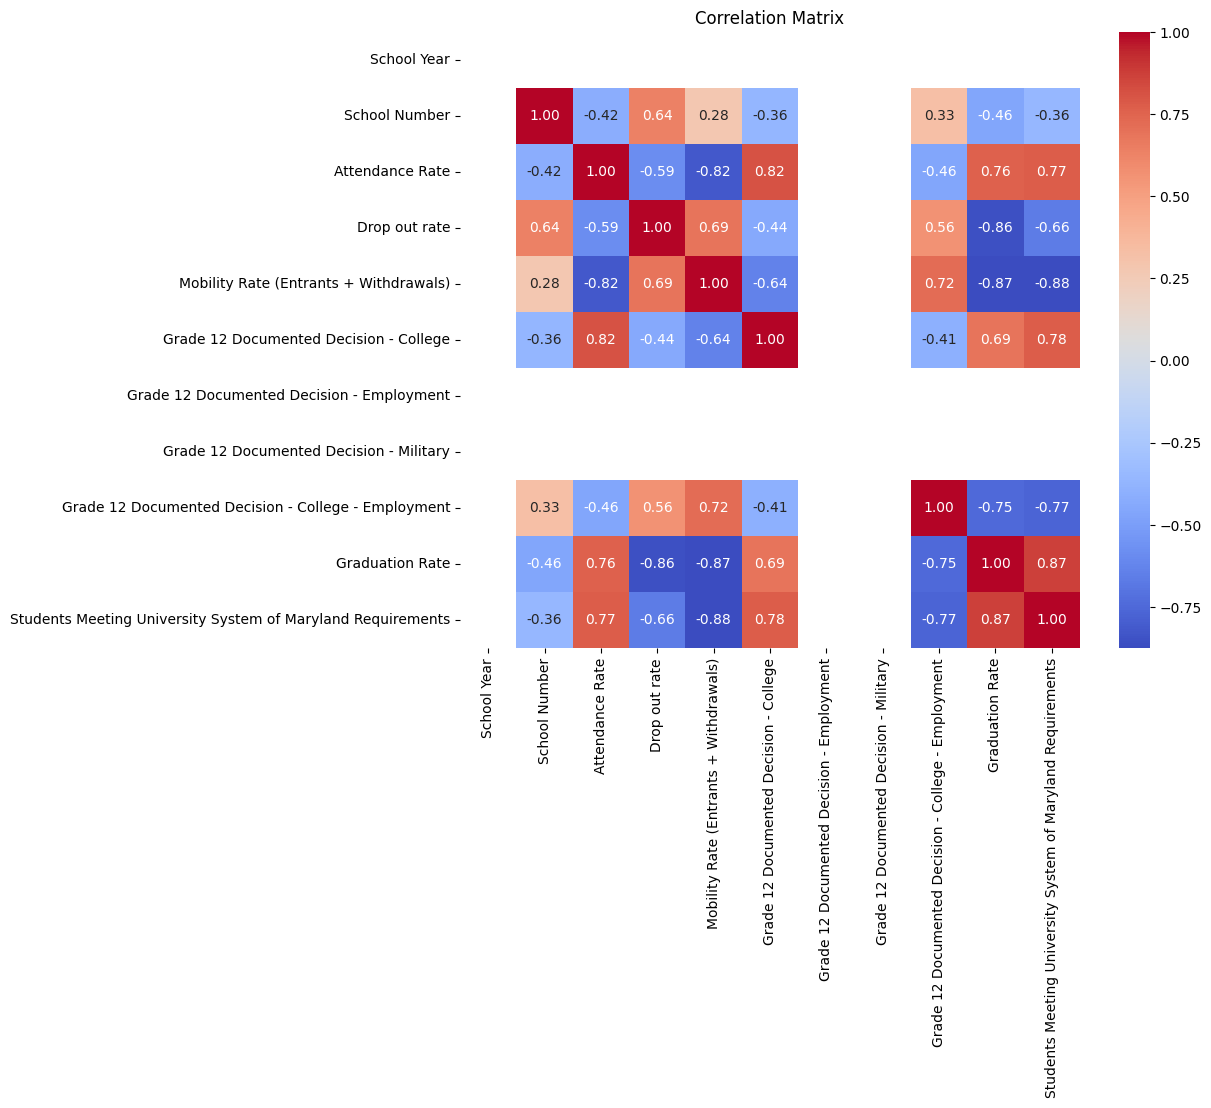

In [19]:
# Correlation matrix between numerical values in 'school'
correlation_matrix = school.select_dtypes(include=np.number).corr()  # Selects only numerical columns

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Now that I have some visuals to see where some of the analysis on my data lay, Let's now merge the dataframes to better analyze them together.

In [20]:
# Merge the dataframes
merged_df = pd.merge(school, df, on='Cluster', how='inner')



In [21]:
correlation = merged_df['Graduation Rate'].corr(merged_df['Median Home Value'])
print(f"Correlation between Graduation Rate and Median Home Value: {correlation}")

Correlation between Graduation Rate and Median Home Value: 0.5359791940387314


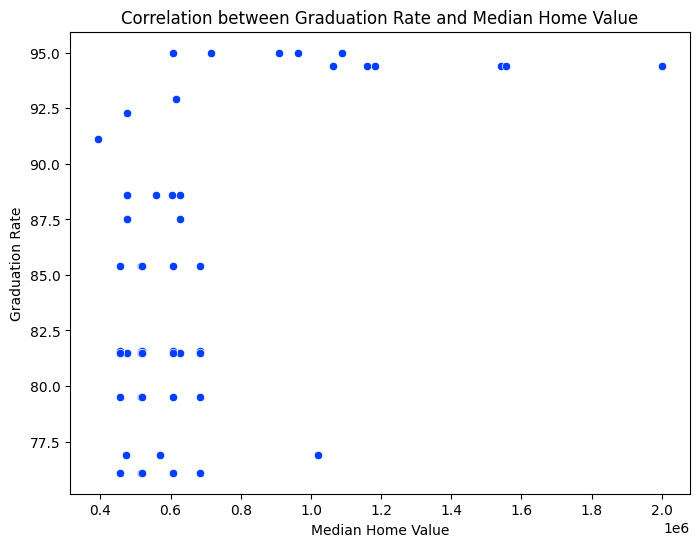

In [22]:
# Let's visualize that correlation with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Median Home Value', y='Graduation Rate', data=merged_df)
plt.title('Correlation between Graduation Rate and Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Graduation Rate')
plt.show()


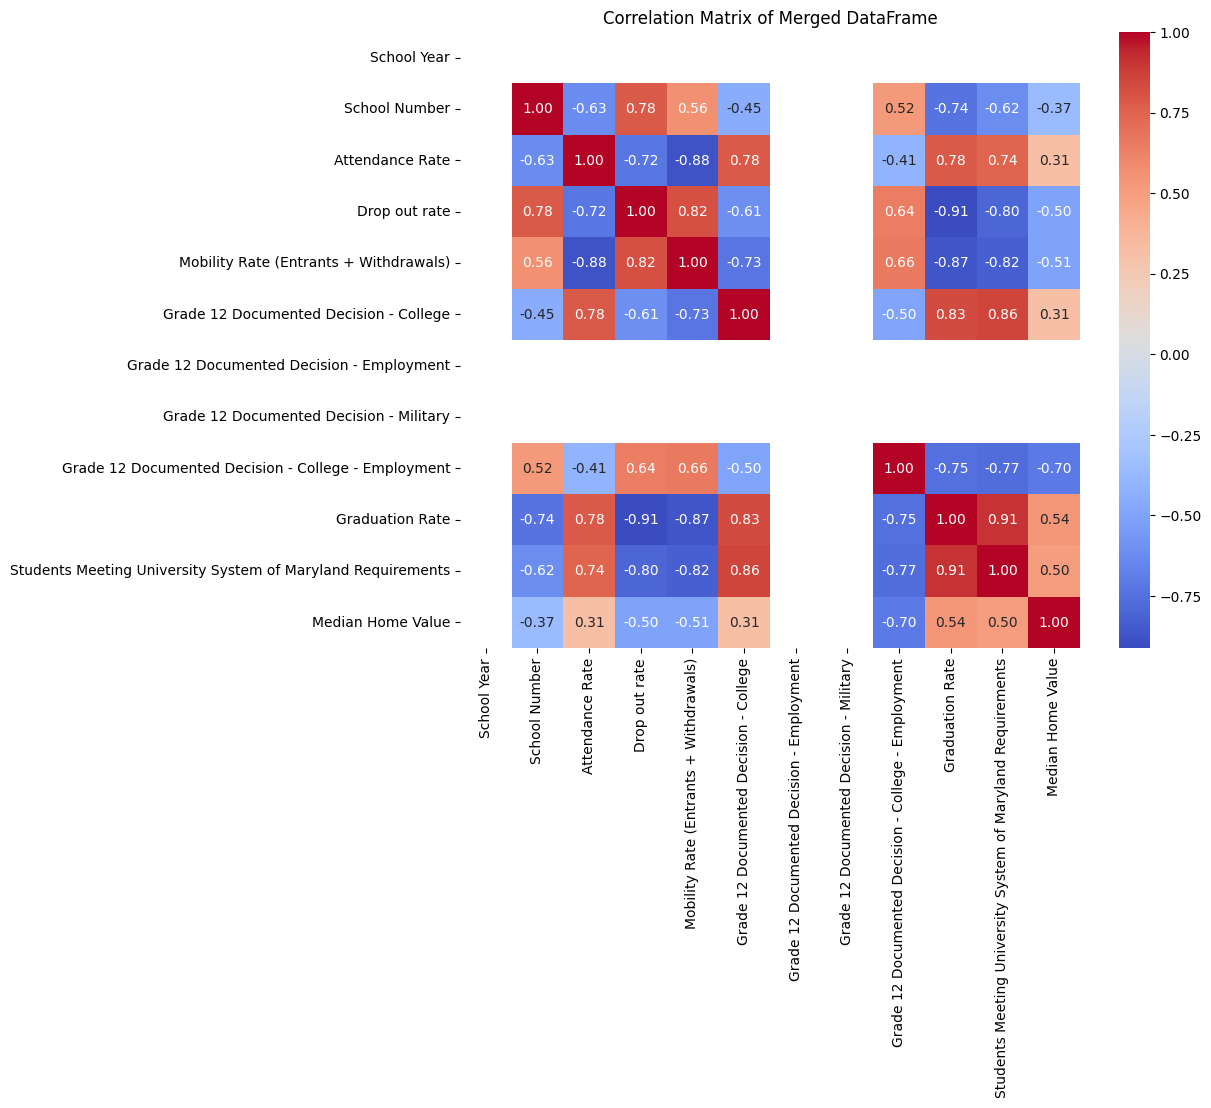

In [23]:
#Correlation matrix and heatmap for median home value and graduation rate

numerical_merged_df = merged_df.select_dtypes(include=np.number)
correlation_matrix = numerical_merged_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged DataFrame')
plt.show()